# Packages & Libraries Needed

In [3]:
pip install split-folders

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
import os 
from os import listdir
from keras.preprocessing import image
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
import tensorflow as tf

# Validation Data

In [6]:
#split dataset 1 (mix normal+hemoragik)
splitfolders.ratio(
    "dataset\seg_train", 
    output="dataset\dataset2",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 14034 files [02:10, 107.90 files/s]


# Load & Explore Data

In [2]:
#melakukan transformasi pada dataset
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

**Training Data**

Found 11224 images belonging to 6 classes.
Classes of Train Data :  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5} 

- buildings, Total images: 1752
- forest, Total images: 1816
- glacier, Total images: 1923
- mountain, Total images: 2009
- sea, Total images: 1819
- street, Total images: 1905


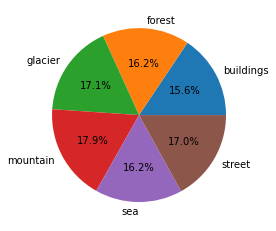

In [3]:
train_set= datagen.flow_from_directory(directory= r"dataset\train",
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size = 250,
                                               )

print('Classes of Train Data : ', train_set.class_indices, '\n')

train_count = {}
for imgType in os.listdir(r"dataset\train"):
    imgTypePath = "dataset/train" + "/" + imgType + "/"
    print("- " + imgType + ", Total images: "+ str(len(os.listdir(imgTypePath))))
    train_count.update({imgType : len(os.listdir(imgTypePath))})

plt.pie([float(train_count[v]) for v in train_count], labels=[str(k) for k in train_count], autopct='%1.1f%%')
plt.show()

Found 11224 files belonging to 6 classes.


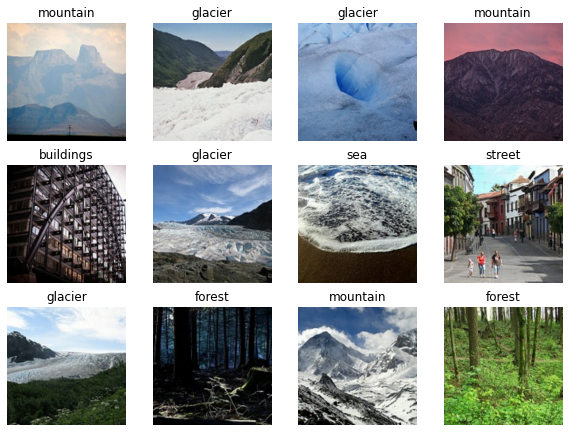

In [4]:
ds = tf.keras.utils.image_dataset_from_directory(r"dataset\train")
class_names = ds.class_names
plt.figure(figsize=(10,10))
for img, labels in ds.take(1):
    # print(class_names[int(labels[0][1])])
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Testing Data**

Found 3000 images belonging to 6 classes.
Classes of Test Data :  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5} 

- buildings, Total images: 437
- forest, Total images: 474
- glacier, Total images: 553
- mountain, Total images: 525
- sea, Total images: 510
- street, Total images: 501


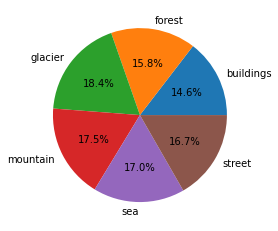

In [5]:
test_set= datagen.flow_from_directory(directory= r"dataset\test",
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size = 250,
                                               )

print('Classes of Test Data : ', train_set.class_indices, '\n')

test_count = {}
for imgType in os.listdir(r"dataset\test"):
    imgTypePath = "dataset/test" + "/" + imgType + "/"
    print("- " + imgType + ", Total images: "+ str(len(os.listdir(imgTypePath))))
    test_count.update({imgType : len(os.listdir(imgTypePath))})

plt.pie([float(test_count[v]) for v in test_count], labels=[str(k) for k in test_count], autopct='%1.1f%%')
plt.show()

Found 3000 files belonging to 6 classes.


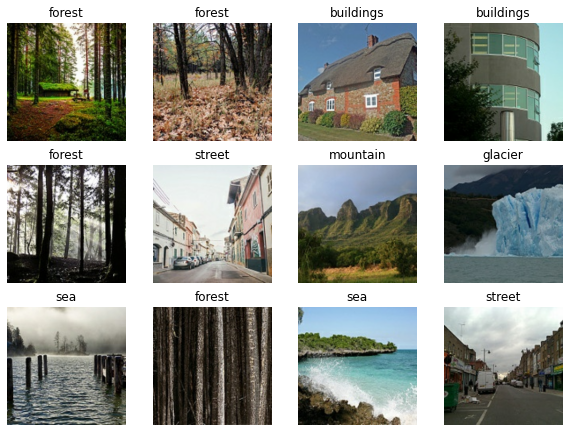

In [6]:
ds = tf.keras.utils.image_dataset_from_directory(r"dataset\test")
class_names = ds.class_names
plt.figure(figsize=(10,10))
for img, labels in ds.take(1):
    # print(class_names[int(labels[0][1])])
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Validation Data**

Found 2810 images belonging to 6 classes.
Classes of Val Data :  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5} 

- buildings, Total images: 439
- forest, Total images: 455
- glacier, Total images: 481
- mountain, Total images: 503
- sea, Total images: 455
- street, Total images: 477


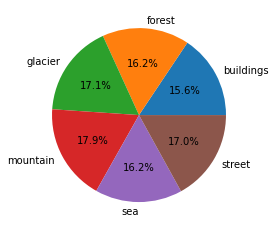

In [7]:
val_set= datagen.flow_from_directory(directory= r"dataset\val",
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size = 250,
                                               )

print('Classes of Val Data : ', val_set.class_indices, '\n')

val_count = {}
for imgType in os.listdir(r"dataset\val"):
    imgTypePath = "dataset/val" + "/" + imgType + "/"
    print("- " + imgType + ", Total images: "+ str(len(os.listdir(imgTypePath))))
    val_count.update({imgType : len(os.listdir(imgTypePath))})

plt.pie([float(val_count[v]) for v in val_count], labels=[str(k) for k in val_count], autopct='%1.1f%%')
plt.show()

Found 2810 files belonging to 6 classes.


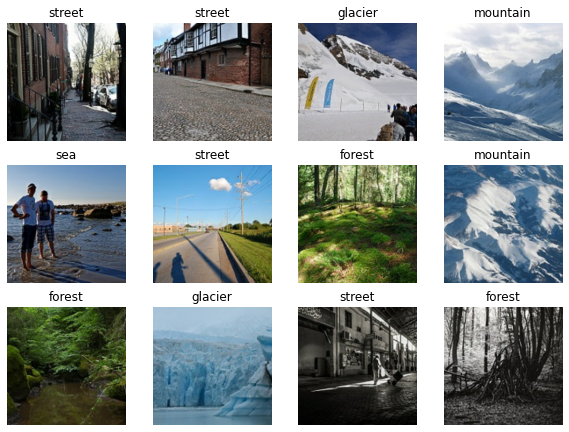

In [8]:
ds = tf.keras.utils.image_dataset_from_directory(r"dataset\val")
class_names = ds.class_names
plt.figure(figsize=(10,10))
for img, labels in ds.take(1):
    # print(class_names[int(labels[0][1])])
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Train, test & val**

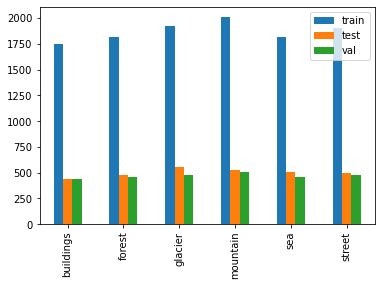

In [9]:
pd.DataFrame({'train': train_count,
              'test': test_count,
              'val' : val_count}, 
             index=class_names
            ).plot.bar()
plt.show()

# Modeling

In [30]:
classifier= Sequential()

classifier.add(Convolution2D(filters=64,
                             kernel_size=(3,3),
                             input_shape=(64, 64,3),
                             kernel_initializer='he_uniform',
                             activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(filters=128,
                             kernel_size=(3,3),
                             kernel_initializer='he_uniform',
                             activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(filters=256,
                             kernel_size=(3,3),
                             kernel_initializer='he_uniform',
                             activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))


classifier.add(Convolution2D(filters=512,
                             kernel_size=(3,3),
                             kernel_initializer='he_uniform',
                             activation='relu'))

classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=128,kernel_initializer='glorot_uniform',activation='relu'))
classifier.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',activation='softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 256)       

In [ ]:
history = classifier.fit(train_set,
                         epochs=50,
                         validation_data=val_set
                        )

Epoch 1/50
45/45 [==============================] - 671s 15s/step - loss: 1.6161 - accuracy: 0.3629 - val_loss: 1.2210 - val_accuracy: 0.4925
Epoch 2/50
45/45 [==============================] - 572s 13s/step - loss: 1.0573 - accuracy: 0.5824 - val_loss: 0.9850 - val_accuracy: 0.6189
Epoch 3/50
45/45 [==============================] - 588s 13s/step - loss: 0.8982 - accuracy: 0.6578 - val_loss: 0.8402 - val_accuracy: 0.6872
Epoch 4/50
45/45 [==============================] - 543s 12s/step - loss: 0.7928 - accuracy: 0.7096 - val_loss: 0.7564 - val_accuracy: 0.7352
Epoch 5/50
45/45 [==============================] - 533s 12s/step - loss: 0.7445 - accuracy: 0.7237 - val_loss: 0.7573 - val_accuracy: 0.7199
Epoch 6/50
45/45 [==============================] - 536s 12s/step - loss: 0.6873 - accuracy: 0.7505 - val_loss: 0.7161 - val_accuracy: 0.7384
Epoch 7/50
45/45 [==============================] - 536s 12s/step - loss: 0.6555 - accuracy: 0.7594 - val_loss: 0.7038 - val_accuracy: 0.7420
Epoch 

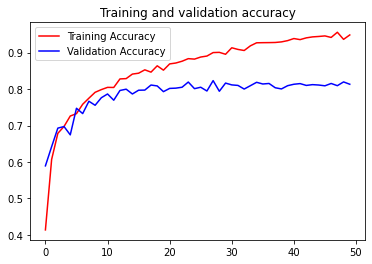

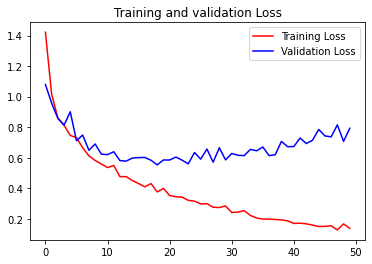

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [26]:
classifier.save("model\model weight\dua_4.h5")
#classifier.load_weights("model\model weight\satu.h5")

# Test & Evaluate Model

In [27]:
import keras.utils as image
from time import perf_counter

#Classes of Test Data :  {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5} 
    
buildings = r"dataset\test\buildings"
forest = r"dataset\test\forest"
glacier = r"dataset\test\glacier"
mountain = r"dataset\test\mountain"
sea = r"dataset\test\sea"
street = r"dataset\test\street"

pred = []
real = []
time_predict = []

for wkwk in os.listdir(buildings):
    start = perf_counter()
    img = fr"dataset\test\buildings\{wkwk}"
    img = image.load_img(img, target_size = (64, 64))
    img = image.img_to_array(img)
    test_image = np.expand_dims(img, axis = 0)
    result = classifier.predict(test_image)
    result = int(np.argmax(result, axis=1))
    duration = perf_counter() - start
    duration = round(duration,2)
    pred.append(result)
    real.append(0)
    time_predict.append(duration)

for wkwk in os.listdir(forest):
    start = perf_counter()
    img = fr"dataset\test\forest\{wkwk}"
    img = image.load_img(img, target_size = (64, 64))
    img = image.img_to_array(img)
    test_image = np.expand_dims(img, axis = 0)
    result = classifier.predict(test_image)
    result = int(np.argmax(result, axis=1))
    duration = perf_counter() - start
    duration = round(duration,2)
    pred.append(result)
    real.append(1)
    time_predict.append(duration)

for wkwk in os.listdir(glacier):
    start = perf_counter()
    img = fr"dataset\test\glacier\{wkwk}"
    img = image.load_img(img, target_size = (64, 64))
    img = image.img_to_array(img)
    test_image = np.expand_dims(img, axis = 0)
    result = classifier.predict(test_image)
    result = int(np.argmax(result, axis=1))
    duration = perf_counter() - start
    duration = round(duration,2)
    pred.append(result)
    real.append(2)
    time_predict.append(duration)

for wkwk in os.listdir(mountain):
    start = perf_counter()
    img = fr"dataset\test\mountain\{wkwk}"
    img = image.load_img(img, target_size = (64, 64))
    img = image.img_to_array(img)
    test_image = np.expand_dims(img, axis = 0)
    result = classifier.predict(test_image)
    result = int(np.argmax(result, axis=1))
    duration = perf_counter() - start
    duration = round(duration,2)
    pred.append(result)
    real.append(3)
    time_predict.append(duration)

for wkwk in os.listdir(sea):
    start = perf_counter()
    img = fr"dataset\test\sea\{wkwk}"
    img = image.load_img(img, target_size = (64, 64))
    img = image.img_to_array(img)
    test_image = np.expand_dims(img, axis = 0)
    result = classifier.predict(test_image)
    result = int(np.argmax(result, axis=1))
    duration = perf_counter() - start
    duration = round(duration,2)
    pred.append(result)
    real.append(4)
    time_predict.append(duration)
    
for wkwk in os.listdir(street):
    start = perf_counter()
    img = fr"dataset\test\street\{wkwk}"
    img = image.load_img(img, target_size = (64, 64))
    img = image.img_to_array(img)
    test_image = np.expand_dims(img, axis = 0)
    result = classifier.predict(test_image)
    result = int(np.argmax(result, axis=1))
    duration = perf_counter() - start
    duration = round(duration,2)
    pred.append(result)
    real.append(5)
    time_predict.append(duration)


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


In [19]:
import itertools

def conf_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
print('Akurasi : ', accuracy_score(real,pred))
print('Precision : ', precision_score(real,pred,average='macro'))
print('Recall : ', recall_score(real,pred,average='macro'))
print('F1-Score : ', f1_score(real,pred,average='macro'))
print('\n',classification_report(real,pred))

avg = sum(time_predict) / len(time_predict)
print(f"\nAvg time predict = {round(avg,2)} Detik")

Akurasi :  0.7366666666666667
Precision :  0.7693115843306776
Recall :  0.7380056169551806
F1-Score :  0.736743195449414

               precision    recall  f1-score   support

           0       0.66      0.77      0.71       437
           1       0.95      0.85      0.90       474
           2       0.59      0.89      0.71       553
           3       0.83      0.48      0.61       525
           4       0.84      0.62      0.72       510
           5       0.75      0.81      0.78       501

    accuracy                           0.74      3000
   macro avg       0.77      0.74      0.74      3000
weighted avg       0.77      0.74      0.73      3000


Avg time predict = 0.13 Detik


Confusion matrix, without normalization


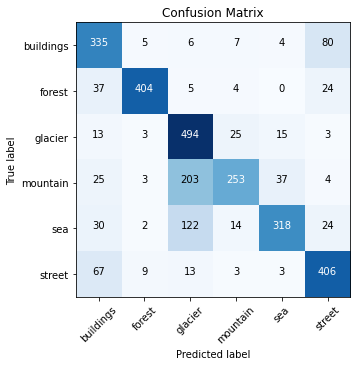

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
class_names = train_set.class_indices.keys()
cm = confusion_matrix(y_true=real, y_pred=pred)
conf_matrix(cm=cm, classes=class_names, title='Confusion Matrix')